In [1]:
import pandas as pd
import glob
path = r'./data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
df

,node_id,timestamp,x,y,z,q
0,-2393099149039893833,2020-06-24 12:20:08.533016+00:00,2762,-257,100,0
1,-2393099149039893833,2020-06-24 12:20:08.620015+00:00,2870,-344,100,0
2,-2393099149039893833,2020-06-24 12:20:09.622827+00:00,2916,-344,100,0
3,-2393099149039893833,2020-06-24 12:20:09.622846+00:00,2894,-254,100,0
4,-2393099149039893833,2020-06-24 12:20:10.116102+00:00,2888,-188,100,0
...,...,...,...,...,...,...
13890901,4996252679627069957,2020-06-01 03:00:05.469336+00:00,635,1064,0,0
13890902,4996252679627069957,2020-06-01 03:00:06.47926+00:00,681,760,0,0
13890903,4996252679627069957,2020-06-01 03:00:08.507118+00:00,622,991,0,0
13890904,4996252679627069957,2020-06-01 03:00:09.547553+00:00,644,1066,0,0


In [209]:
print("Number of nodes: %s" % len(df["node_id"].unique()))

print("First node: %s" % df["node_id"].unique()[0])
node = df["node_id"].unique()[0]

df1 = df[df["node_id"] == node]
df1

Number of nodes: 32
First node: -2393099149039893833


,node_id,timestamp,x,y,z,q
0,-2393099149039893833,2020-06-24 12:20:08.533016+00:00,2762,-257,100,0
1,-2393099149039893833,2020-06-24 12:20:08.620015+00:00,2870,-344,100,0
2,-2393099149039893833,2020-06-24 12:20:09.622827+00:00,2916,-344,100,0
3,-2393099149039893833,2020-06-24 12:20:09.622846+00:00,2894,-254,100,0
4,-2393099149039893833,2020-06-24 12:20:10.116102+00:00,2888,-188,100,0
...,...,...,...,...,...,...
583869,-2393099149039893833,2020-10-23 06:57:02.988595+00:00,2766,-339,100,0
583870,-2393099149039893833,2020-10-23 06:57:21.988764+00:00,2772,-354,100,0
583871,-2393099149039893833,2020-10-23 06:57:31.988804+00:00,2776,-370,100,0
583872,-2393099149039893833,2020-10-23 06:57:41.988742+00:00,2775,-363,100,0


In [263]:
def xy_to_grid(data,x,y,k):
    
    x_cut = pd.cut(data.x, k,labels=False)
    y_cut = pd.cut(data.y, k,labels=False)
    
    # Laitetaan saadut arvot dataframeen
    data['x_grid'] = x_cut.values
    data['y_grid'] = y_cut.values
    return data

df_grid = xy_to_grid(df1,df1.x, df1.y, 10)
df_grid

<ipython-input-263-7141d0099610>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['x_grid'] = x_cut.values
<ipython-input-263-7141d0099610>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y_grid'] = y_cut.values


,node_id,timestamp,x,y,z,q,x_grid,y_grid
0,-2393099149039893833,2020-06-24 12:20:08.533016+00:00,2762,-257,100,0,4,4
1,-2393099149039893833,2020-06-24 12:20:08.620015+00:00,2870,-344,100,0,5,4
2,-2393099149039893833,2020-06-24 12:20:09.622827+00:00,2916,-344,100,0,5,4
3,-2393099149039893833,2020-06-24 12:20:09.622846+00:00,2894,-254,100,0,5,4
4,-2393099149039893833,2020-06-24 12:20:10.116102+00:00,2888,-188,100,0,5,4
...,...,...,...,...,...,...,...,...
583869,-2393099149039893833,2020-10-23 06:57:02.988595+00:00,2766,-339,100,0,4,4
583870,-2393099149039893833,2020-10-23 06:57:21.988764+00:00,2772,-354,100,0,4,4
583871,-2393099149039893833,2020-10-23 06:57:31.988804+00:00,2776,-370,100,0,4,4
583872,-2393099149039893833,2020-10-23 06:57:41.988742+00:00,2775,-363,100,0,4,4


### Visualisoidaan outliereita

x mean:  3.481874514021861
y mean:  4.594045975672834
x std:  0.8390423652762097
y std:  0.9315693112801916


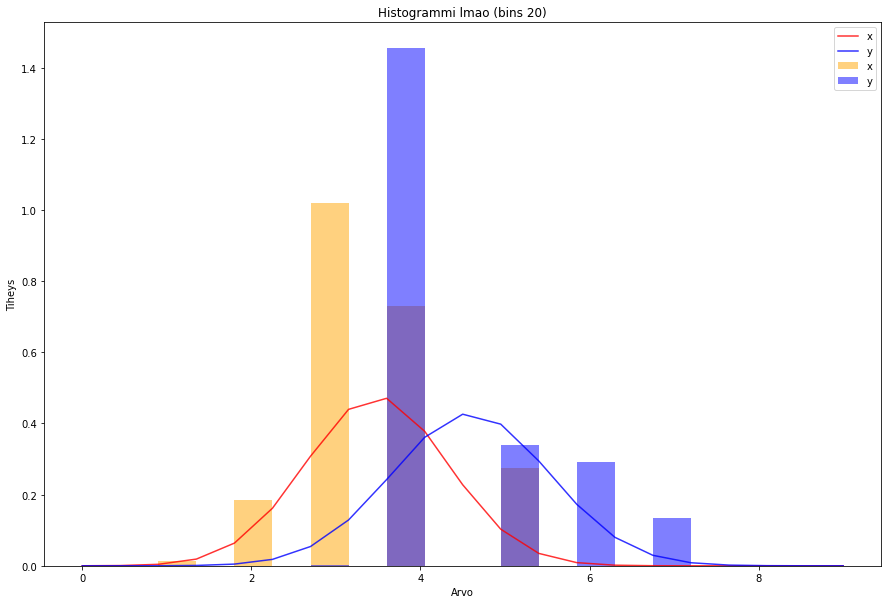

In [266]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

def draw_histogram(x, y, bin_num):
    plt.figure(figsize=(15,10))
    # mean of distribution
    mu = np.mean(x)
    mu2 = np.mean(y)
    print("x mean: ", mu)
    print("y mean: ", mu2)

    # standard deviation of distribution
    sigma = np.std(x)
    sigma2 = np.std(y)
    print("x std: ", sigma)
    print("y std: ", sigma2)

    # bins
    num_bins = bin_num

    # the histogram of the data
    n, bins, patches = plt.hist(x, num_bins, density=1, facecolor='orange', alpha=0.5, label='x')
    n2, bins2, patches2 = plt.hist(y, num_bins, density=1, facecolor='blue', alpha=0.5, label='y')

    # add a 'best fit' line
    y = norm.pdf(bins, mu, sigma)
    y2 = norm.pdf(bins2, mu2, sigma2)

    # This is what it norm.pdf does
    #y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    #y2 = ((1 / (np.sqrt(2 * np.pi) * sigma2)) * np.exp(-0.5 * (1 / sigma2 * (bins2 - mu2))**2))

    plt.plot(bins, y, 'r', alpha=0.8, label='x')
    plt.plot(bins2, y2, 'b', alpha=0.8, label='y')

    plt.title("Histogrammi lmao (bins %s)" % num_bins)
    plt.xlabel("Arvo")
    plt.ylabel("Tiheys")
    plt.legend()
    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()
    
draw_histogram(df_grid['x'], df_grid['y'], 20)

### Laitetaan eri dataframeen koska lmao

In [268]:
df2 = df_grid[["x","y"]]
df2.head()

,x,y
0,2762,-257
1,2870,-344
2,2916,-344
3,2894,-254
4,2888,-188


### Yksi tapa etsiä outliereita (z-score)

In [269]:
import numpy as np
df_clean = df2[np.abs(df2-df2.mean()) <= (2*df2.std())]
df_clean

,x,y
0,2762.0,-257.0
1,2870.0,-344.0
2,2916.0,-344.0
3,2894.0,-254.0
4,2888.0,-188.0
...,...,...
583869,2766.0,-339.0
583870,2772.0,-354.0
583871,2776.0,-370.0
583872,2775.0,-363.0


In [270]:
outliers = {}
for i in range(df_clean.shape[1]):
    min_t = df_clean[df_clean.columns[i]].mean() - (3 * df_clean[df_clean.columns[i]].std())
    max_t = df_clean[df_clean.columns[i]].mean() + (3 * df_clean[df_clean.columns[i]].std())
    count = 0
    for j in df_clean[df_clean.columns[i]]:
        if j < min_t or j > max_t:
            count += 1
    outliers[df_clean.columns[i]] = [count,df_clean.shape[0]-count]
outliers

{'x': [0, 583874], 'y': [0, 583874]}

### Toinen tapa etsiä outliereita (z-score)

In [272]:
df_clean = df2

In [273]:
print(df_clean['x'].describe())
print("-"*20,"\n",df_clean['y'].describe())

count    583874.000000
mean       2003.069119
std         889.159799
min       -2260.000000
25%        1333.000000
50%        1790.000000
75%        2783.000000
max        7993.000000
Name: x, dtype: float64
-------------------- 
 count    583874.000000
mean        532.659543
std        1067.793043
min       -5191.000000
25%        -184.000000
50%         -91.000000
75%        1357.000000
max        6194.000000
Name: y, dtype: float64


In [274]:
# Every data point that lies beyond the upper limit and lower limit will be an outlier
upper = df_clean['x'].mean() + 3*df_clean['x'].std()
lower = df_clean['x'].mean() -3*df_clean['x'].std()

print(upper)
print(lower)

4670.548516200846
-664.4102774712574


In [275]:
# Pick data points that fall under these limits.
#df_clean['zscore'] = df_clean[(df_clean['x']<upper) & (df_clean['x']>lower)]

# Z- score that tells about how far data is away from standard deviation
df_clean['zscore'] = (df_clean['x'] - df_clean['x'].mean() ) / df_clean['x'].std()

# This can be done with zscore function
df_clean = df_clean[(df_clean.zscore>-3) & (df_clean.zscore<3)]
df_clean

<ipython-input-275-f59d0525eeb2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['zscore'] = (df_clean['x'] - df_clean['x'].mean() ) / df_clean['x'].std()


,x,y,zscore
0,2762,-257,0.853537
1,2870,-344,0.975000
2,2916,-344,1.026734
3,2894,-254,1.001992
4,2888,-188,0.995244
...,...,...,...
583869,2766,-339,0.858036
583870,2772,-354,0.864784
583871,2776,-370,0.869282
583872,2775,-363,0.868158


In [276]:
# Pick only the ones in 3 std
print(df_clean[df_clean['zscore']>3])
print(df_clean[df_clean['zscore']<-3])

Empty DataFrame
Columns: [x, y, zscore]
Index: []
Empty DataFrame
Columns: [x, y, zscore]
Index: []


In [277]:
print(np.mean(df_clean))
print(np.std(df_clean))

x         2007.746744
y          530.812372
zscore       0.005261
dtype: float64
x          881.244058
y         1067.406602
zscore       0.991098
dtype: float64


### Outlierien jälkeen

x mean:  2007.7467435118956
y mean:  530.812372424913
x std:  881.2440579789109
y std:  1067.4066022666534


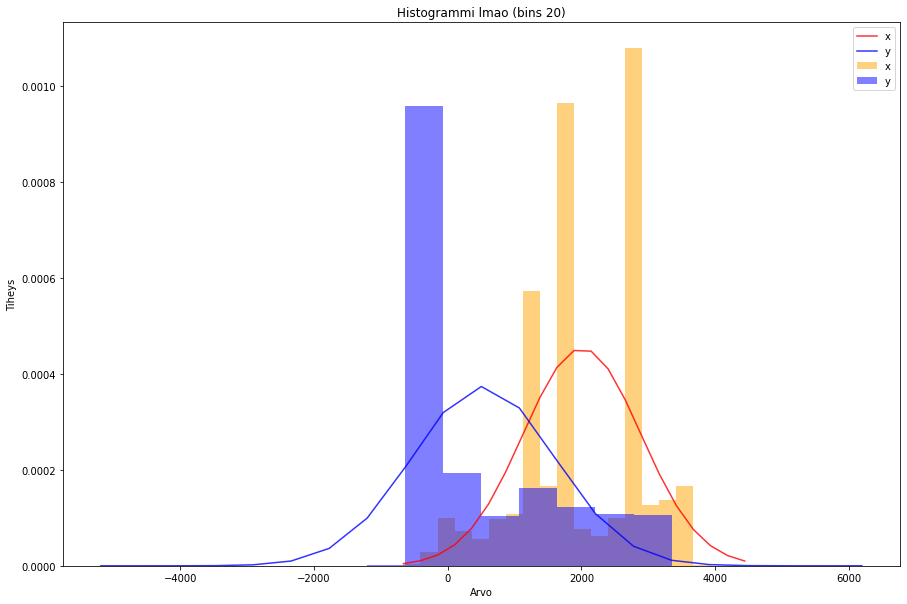

In [278]:
draw_histogram(df_clean['x'], df_clean['y'], 20)

x mean:  2007.7467435118956
y mean:  2007.7467435118956
x std:  881.2440579789109
y std:  1067.4066022666534


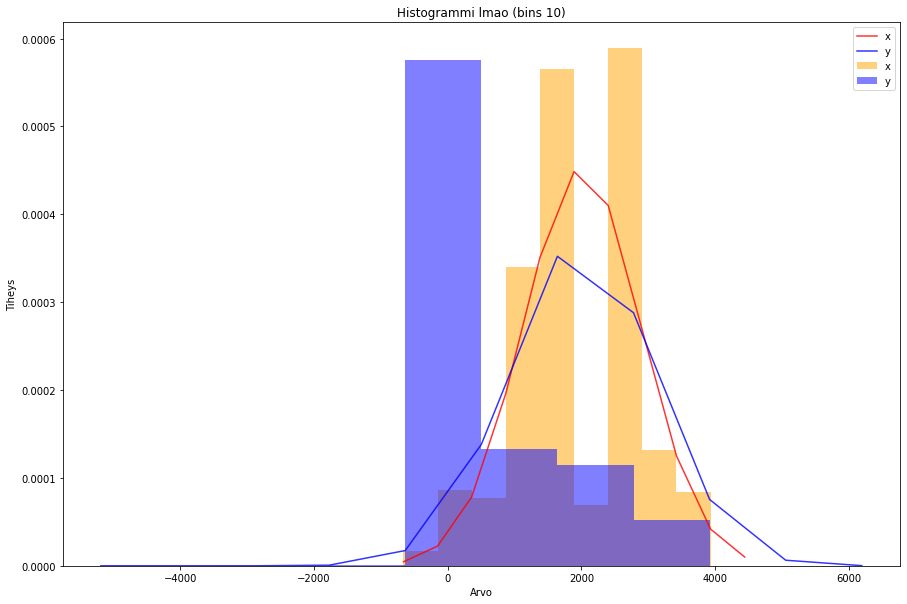

In [248]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns


plt.figure(figsize=(15,10))
# mean of distribution
mu = np.mean(df_clean['x'])
mu2 = np.mean(df_clean['x'])
print("x mean: ", mu)
print("y mean: ", mu2)

# standard deviation of distribution
sigma = np.std(df_clean['x'])
sigma2 = np.std(df_clean['y'])
print("x std: ", sigma)
print("y std: ", sigma2)

# bins
num_bins = 10

# the histogram of the data
n, bins, patches = plt.hist(df_clean['x'], num_bins, density=1, facecolor='orange', alpha=0.5, label='x')
n2, bins2, patches2 = plt.hist(df_clean['y'], num_bins, density=1, facecolor='blue', alpha=0.5, label='y')

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
y2 = norm.pdf(bins2, mu2, sigma2)

# This is what it norm.pdf does
#y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
#y2 = ((1 / (np.sqrt(2 * np.pi) * sigma2)) * np.exp(-0.5 * (1 / sigma2 * (bins2 - mu2))**2))

plt.plot(bins, y, 'r', alpha=0.8, label='x')
plt.plot(bins2, y2, 'b', alpha=0.8, label='y')

plt.title("Histogrammi lmao (bins %s)" % num_bins)
plt.xlabel("Arvo")
plt.ylabel("Tiheys")
plt.legend()
# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

<AxesSubplot:ylabel='Density'>

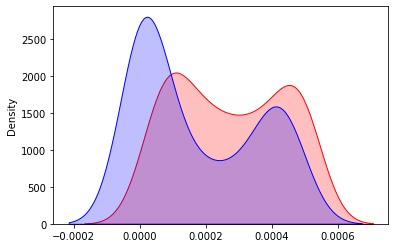

In [178]:
#fig, ax = plt.subplots(figsize =(10, 7)) 
#plt.scatter(df_clean['x'], df_clean['y'])
#plt.xlim(df_clean.min(), df_clean.max())
#plt.ylim(df_clean.min(), df_clean.max())
kwargs = dict(histtype='stepfilled', alpha=0.5, bins=40)

'''x = df_clean['x'].tolist()
y = df_clean['y'].tolist()
names = ['x','y']'''

#plt.hist([x, y], label=names)
#plt.hist(df_clean['x'], **kwargs, label="x")
#plt.hist(df_clean['y'], **kwargs, label="y")
sns.kdeplot(y, shade=True, color="r")
sns.kdeplot(y2, shade=True, color="b")